In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [ ]:
# !pip install sklearn


In [10]:
train_dir="../Facial Recognition/input/face-recognition-dataset/Original Images/Original Images/"

In [11]:
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [14]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 305s 4s/step - loss: 3.5028 - accuracy: 0.0839
Epoch 2/30
81/81 [==============================] - 288s 4s/step - loss: 2.6956 - accuracy: 0.2268
Epoch 3/30
81/81 [==============================] - 286s 4s/step - loss: 2.1851 - accuracy: 0.3443
Epoch 4/30
81/81 [==============================] - 284s 4s/step - loss: 1.7979 - accuracy: 0.4606
Epoch 5/30
81/81 [==============================] - 282s 3s/step - loss: 1.4849 - accuracy: 0.5402
Epoch 6/30
81/81 [==============================] - 277s 3s/step - loss: 1.2683 - accuracy: 0.6069
Epoch 7/30
81/81 [==============================] - 277s 3s/step - loss: 0.9986 - accuracy: 0.6971
Epoch 8/30
81/81 [==============================] - 277s 3s/step - loss: 0.6757 - accuracy: 0.8165
Epoch 9/30
81/81 [==============================] - 286s 4s/step - loss: 0.6407 - accuracy: 0.8134
Epoch 10/30
81/81 [==============================] - 282s 3s/step - loss: 0.4353 - accuracy: 0.8860
Epoch 11/

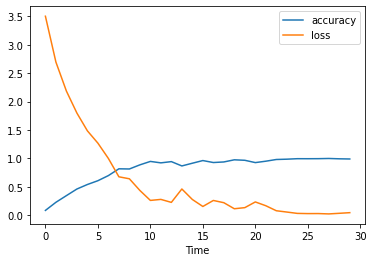

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [16]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

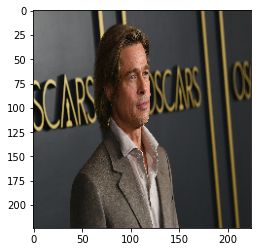

Actual: Brad Pitt
Predicted: Brad Pitt


In [21]:
predict_image("../Facial Recognition/input/face-recognition-dataset/Original Images/Original Images/Brad Pitt/Brad Pitt_101.jpg")

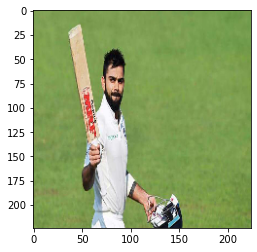

Actual: Virat Kohli
Predicted: Virat Kohli


In [31]:
predict_image("../Facial Recognition/input/face-recognition-dataset/Original Images/Original Images/Virat Kohli/Virat Kohli_35.jpg")